# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
import pickle as pkl
import time
import datetime
from datetime import datetime
import random 
from functools import partial
%matplotlib inline
# from tabulate import tabulate

import sklearn
from sklearn.externals import joblib
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import os
from joblib import dump, load

#from clean_data import create_offeranalysis_dataset,create_combined_records
#from build_model import evaluate_model_performance

import sys
import sqlite3
from sqlalchemy import create_engine

# 本项目结构

1. 数据读取
2. 数据清洗
3. 确定目标，创建训练和测试数据集
4. 训练模型
5. 提供模型预测效果和结论

## 1. 数据读取

In [4]:
# read in the json files
portfolio_raw = pd.read_json('data/portfolio.json', orient = 'records', lines = True)
profile_raw = pd.read_json('data/profile.json', orient = 'records', lines = True)
transcript_raw = pd.read_json('data/transcript.json', orient = 'records', lines = True)

# 备份数据
portfolio = portfolio_raw
profile = profile_raw
transcript = transcript_raw

## 2.1 清洗 portfolio
#### 数据集

In [5]:
portfolio_raw.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


portfolio.json
30 天试验期间的推送（10 个推送 X 6 个字段）

- reward：数值变量，满足推送的要求后给与的优惠
- channels：字符串列表 - 网站 web；邮件 email；短信 mobile；社交平台 social
- difficulty：数值变量，满足推送的要求所需的最少花费，即最低消费额度
- duration：数值变量，推送持续的时间，单位是天
- offer_type：推送的种类，例如 BOGO、打折（discount）、信息（informational）
- id：string/hash，推送 id

#### 以下为处理过程

In [6]:
#rename column
portfolio.rename(columns = {'id':'offer_id'}, inplace = True)

In [7]:
# One hot encode the 'channels' columns

MultiLabel = MultiLabelBinarizer()
channels_df = pd.DataFrame(MultiLabel.fit_transform(portfolio['channels']),
                   columns=MultiLabel.classes_)
channels_df.head()

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1


In [8]:
# One hot encode the 'offer_type' columns

offertype_df = pd.get_dummies(portfolio['offer_type'])
offertype_df.head()

,bogo,discount,informational
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0


In [9]:
portfolio = pd.concat([portfolio, offertype_df, channels_df], axis=1)
portfolio.drop(columns=['offer_type', 'channels'],inplace=True)

In [10]:
portfolio

,reward,difficulty,duration,offer_id,bogo,discount,informational,email,mobile,social,web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,1,1,1,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1,1,1,1
2,0,0,4,3f207df678b143eea3cee63160fa8bed,0,0,1,1,1,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1,1,0,1
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1,0,0,1
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,1,1,1,1
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,1,1,1,1
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,1,0
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,1,1,1,1
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,0,1,0,1,1,0,1


In [11]:
portfolio.isnull().sum()

reward           0
difficulty       0
duration         0
offer_id         0
bogo             0
discount         0
informational    0
email            0
mobile           0
social           0
web              0
dtype: int64

**由此可见 portfolio 各字段没有空值**

## 2.2 清洗 profile
#### 数据集

In [12]:
profile_raw.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


profile.json
得到奖励的顾客（17000 个用户 x 5 个字段）

- gender：性别，分类变量，M, F, O, 或者 null
- age：年龄，数值变量，缺失值编码为118
- id：string/hash，顾客 ID
- became_member_on：第一次注册时间，日期格式 - YYYYMMDD
- income：收入，数值变量

In [13]:
profile.rename(columns = {'id':'customer_id'},inplace = True)

In [14]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [15]:
# check 为空的字段
total = profile.isnull().sum().sort_values(ascending = False)
percent = (profile.isnull().sum()/profile.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).head()

,Total,Percent
income,2175,12.794118
gender,2175,12.794118
became_member_on,0,0.000000
customer_id,0,0.000000
age,0,0.000000


**由此可见 gender 和 income 均有2175个空值**

### 年龄分布

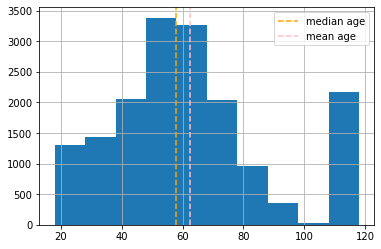

In [16]:
profile.age.hist()
plt.axvline(profile.age.median(), color = 'orange', linestyle = '--', label = 'median age')
plt.axvline(profile.age.mean(), color = 'pink', linestyle = '--', label = 'mean age')
plt.legend()
plt.show()

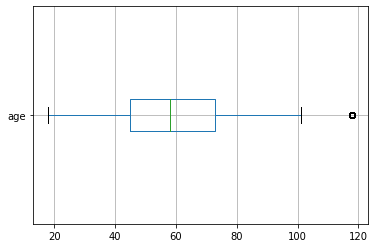

In [17]:
profile.boxplot(['age'], vert = False)

In [18]:
profile[profile['age']==118].count()

gender                 0
age                 2175
customer_id         2175
became_member_on    2175
income                 0
dtype: int64

In [19]:
profile[profile['age']==118].head()

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


**所以年龄为118的 可能是统计过程中的异常值。当年龄为118时候，income gender也为空值。**

#### become_member_on 这一列可以拆分成 年月日，按照10年为一档进一步拆分，可以用来在之后的建模

In [20]:
def convert_to_datetime(elem):
    """Converts a string to a datetime object
    
    INPUT:
        elem: String that stores a date in the %Y%m%d format
    OUTPUT:
        datetimeobj: Datetime object"""
    return datetime.strptime(str(elem), '%Y%m%d')

# Transform the 'became_member_on' column to a datetime object
profile['became_member_on'] = profile['became_member_on'].apply(convert_to_datetime)

# One hot encode a customer's membership start year
profile['membershipstartyear'] = profile['became_member_on'].apply(lambda elem: elem.year)
profile['membershipstartMonth'] = profile['became_member_on'].apply(lambda elem: elem.month)
profile['membershipstartday'] = profile['became_member_on'].apply(lambda elem: elem.day)

# One hot encode a customer's age range
min_age_limit = np.int(np.floor(np.min(profile['age'])/10)*10)
max_age_limit = np.int(np.ceil(np.max(profile['age'])/10)*10)


profile['agerange'] = pd.cut(profile['age'],(range(min_age_limit,max_age_limit +10, 10)),right=False)
profile['agerange'] = profile['agerange'].astype('str')

agerange_df = pd.get_dummies(profile['agerange'])
profile = pd.concat([profile,agerange_df], axis=1)

### 性别处理

In [21]:
gender_df = pd.get_dummies(profile['gender'])
profile = pd.concat([profile,gender_df], axis=1)

profile.drop(columns=['became_member_on','agerange','gender'],inplace=True)
profile.head()

,age,customer_id,income,membershipstartyear,membershipstartMonth,membershipstartday,"[10, 20)","[100, 110)","[110, 120)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)",F,M,O
0,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,2,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,7,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,118,a03223e636434f42ac4c3df47e8bac43,NaN,2017,8,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Drop missing values
profile.dropna(inplace = True)

### 收入分布 可视化探索

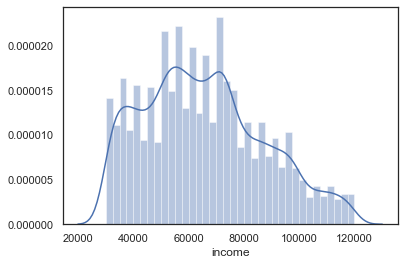

In [33]:

x = pd.Series(profile.income, name="income")
ax = sns.distplot(x)

#### 按照不同性别信息，进一步分析收入分布

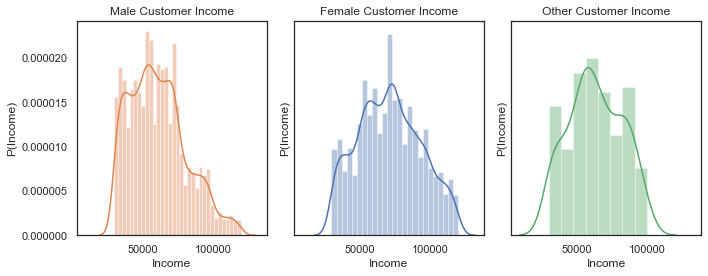

In [25]:
male_customers = profile[profile['M'] == 1]
female_customers = profile[profile['F'] == 1]
other_customers=profile[profile['O'] == 1]
current_palette = sns.color_palette()

sns.set(font_scale=1)
sns.set_style('white')

fig, ax = plt.subplots(figsize=(10, 4),
                       nrows=1,
                       ncols=3,
                       sharex=True,
                       sharey=True)

plt.sca(ax[0])
sns.distplot(male_customers['income'],
             color=current_palette[1])
plt.xlabel('Income')
plt.ylabel('P(Income)')
plt.title('Male Customer Income')

plt.sca(ax[1])
sns.distplot(female_customers['income'],
             color=current_palette[0])
plt.xlabel('Income')
plt.ylabel('P(Income)')
plt.title('Female Customer Income')

plt.sca(ax[2])
sns.distplot(other_customers['income'],
             color=current_palette[2])
plt.xlabel('Income')
plt.ylabel('P(Income)')
plt.title('Other Customer Income')

plt.tight_layout()

**由此可见，男性略有左偏，而女性与未透露性别信息的的收入分布无明显不对称性。**

## 2.3 清洗 transcript
#### 数据集

In [161]:
transcript_raw.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [162]:
transcript_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
person    306534 non-null object
event     306534 non-null object
value     306534 non-null object
time      306534 non-null int64
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


transcript.json
事件记录 (306648 个事件 x 4 个字段)

- person：string/hash，顾客id
- event：string，收到的推送 offer received；推送已阅offer viewed；交易记录 transaction；完成的推送交易 offer completed
- value：字典，类型根据事件的类型而变
- offer id：(string/hash) 推送 id
- amount：(数值变量) 交易额
- reward：(数值变量) 满足推送的要求后得到的优惠
- time：数值变量，开始实验后第几个小时

### 调整字段名称

**与其他数据集保持一致**

In [27]:
# change person --> customer_id
transcript.rename(columns = {'person': 'customer_id'}, inplace=True)

### 关注有顾客数据的交易数据

In [28]:
select_data = transcript['customer_id'].isin(profile['customer_id'])
transcript = transcript[select_data]

In [29]:
# 从小时转换为天
transcript['time'] /= 24.0
# Change 'time' --> 'timedays'
# transcript.rename(columns = {'time':'timedays'}, inplace=True)

In [30]:
# event 字段
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [31]:
# value 字段
transcript.value.apply(lambda x: list(x.keys())[0]).unique()

array(['offer id', 'amount', 'offer_id'], dtype=object)

In [168]:
# explore transcript
transcript[transcript['event'] == 'offer received'].head()

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0


In [169]:
# explore transcript
transcript[transcript['event'] == 'offer viewed'].head()

,customer_id,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0.0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0.0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0.0


In [170]:
# explore transcript
transcript[transcript['event'] == 'transaction'].head()

,customer_id,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0.0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0.0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0.0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0.0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0.0


In [171]:
# explore transcript
transcript[transcript['event'] == 'offer completed'].head()

,customer_id,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0.0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0.0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0.0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0.0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0.0


### 处理value列
**对该字段中字典的处理**用pd.Series进行处理

In [32]:
transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis = 1)

# 将 offer id 和 offer_id 合并
transcript['offer_id_combine'] = np.where(transcript['offer id'].isnull() & transcript['offer_id'].notnull(), transcript['offer_id'], transcript['offer id'])

transcript.drop(columns = ['offer id','offer_id'], inplace = True)
transcript.rename(columns = {'offer_id_combine':'offer_id'}, inplace = True)
transcript.head()

,customer_id,event,value,time,amount,reward,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0.0,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0,NaN,NaN,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7


### event列处理, 得到 event_df

In [34]:
event_df = pd.get_dummies(transcript['event'])
   
# Create a DataFrame that describes customer offer events
transcript = pd.concat([transcript, event_df], axis=1)

transcript.rename(columns={'offer completed':'completed','offer received':'received','offer viewed':'viewed'},inplace=True)

transcript.drop(columns=['event','value'],inplace=True)



In [35]:
# offer_data 是 交易数据
offer_data = transcript.drop(columns=['amount','reward','transaction'])
offer_data.head()



,customer_id,time,offer_id,completed,received,viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
2,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0
5,389bc3fa690240e798340f5a15918d5c,0.0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0.0,3f207df678b143eea3cee63160fa8bed,0,1,0
8,aa4862eba776480b8bb9c68455b8c2e1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0


In [36]:
# transaction_data 是 event 为 transaction的数据集
transaction_data = transcript.drop(columns=['reward','offer_id','completed','received','viewed'])
transaction_data = transaction_data[transaction_data['transaction']==1]
transaction_data.head()



,customer_id,time,amount,transaction
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83,1
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56,1
12659,54890f68699049c2a04d415abc25e717,0.0,13.23,1
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.0,19.51,1
12671,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97,1


In [38]:
# customerid_list 是交易数据中的顾客id
customerid_list = offer_data['customer_id'].unique()
customerid_list

array(['78afa995795e4d85b5d9ceeca43f5fef',
       'e2127556f4f64592b11af22de27a7932',
       '389bc3fa690240e798340f5a15918d5c', ...,
       '8578196a074a4f328976e334fa9383a3',
       '9fcbff4f8d7241faa4ab8a9d19c8a812',
       '3045af4e98794a04a5542d3eac939b1f'], dtype=object)

## 3. 确定目标，创建训练和测试数据集

In [46]:
def create_offeranalysis_dataset(profile,
                                 portfolio,
                                 offer_data,
                                 transaction_data):
    """ Creates an analytic dataset from the following Starbucks challenge 
    datasets:
    * portfolio.json - Contains offer ids and meta data (duration, type,
                       etc.)
    * profile.json - demographic data for each customer
    * transcript.json - records for transactions, offers received, offers
                        viewed, and offers completed
                        
    INPUT:
        profile: DataFrame that contains demographic data for each 
                 customer
        portfolio: Contains offer ids and meta data (duration, type, etc.)
        offer_data: DataFrame that describes customer offer data
        transaction: DataFrame that describes customer transactions
    OUTPUT:
        clean_data: DataFrame that characterizes the effectiveness of
                    customer offers"""
    clean_data = []
    customerid_list = offer_data['customer_id'].unique()

    for idx in tqdm(range(len(customerid_list))):
        clean_data.extend(create_combined_records(customerid_list[idx],
                                                  portfolio,
                                                  profile,
                                                  offer_data,
                                                  transaction_data))

        time.sleep(0.01)                                          

    clean_data = pd.DataFrame(clean_data)

    # Initialize a list that describes the desired output DataFrame
    # column ordering
    column_ordering = ['time', 'offer_id', 'customerid', 'totalamount',
                       'offersuccessful','duration',
                       'reward', 'bogo', 'discount', 'informational',
                       'email', 'mobile', 'social', 'web', 'F','M','O',
                       'income', 
                       '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
                       '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)',
                       '[90, 100)', '[100, 110)']

    clean_data = pd.DataFrame(data=clean_data, columns=column_ordering)

    clean_data = clean_data.sort_values('time')
    return clean_data.reset_index(drop=True)


def create_combined_records(customer_id,
                            portfolio,
                            profile,
                            offer_data,
                            transaction_data):
    """ 
    Creates a list of dictionaries that describes the effectiveness of
    offers to a specific customer
    INPUT:
        customer_id: String that refers to a specific customer
        profile: DataFrame that contains demographic data for each 
                 customer
                 
        portfolio: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
        offer_data: DataFrame that describes customer offer data
        transaction: DataFrame that describes customer transactions
    
    OUTPUT:
        rows: List of dictionaries that describes the effectiveness of
              offers to a specific customer
    """
    # Select a customer's profile
    cur_customer = profile[profile['customer_id'] == customer_id]

    # Select offer data for a specific customer
    select_offer_data = offer_data['customer_id'] == customer_id
    customer_offer_data = offer_data[select_offer_data]
    customer_offer_data = customer_offer_data.drop(columns='customer_id')
    customer_offer_data = customer_offer_data.reset_index(drop=True)

    # Select transactions for a specific customer
    select_transaction = transaction_data['customer_id'] == customer_id
    customer_transaction_data = transaction_data[select_transaction]

    customer_transaction_data =customer_transaction_data.drop(columns='customer_id')

    customer_transaction_data =customer_transaction_data.reset_index(drop=True)

    # Initialize DataFrames that describe when a customer receives,
    # views, and completes an offer
    event_type = ['completed',
                  'received',
                  'viewed']

    offer_received = customer_offer_data[customer_offer_data['received'] == 1]

    offer_received = offer_received.drop(columns=event_type)
    offer_received = offer_received.reset_index(drop=True)

    offer_viewed =customer_offer_data[customer_offer_data['viewed'] == 1]

    offer_viewed = offer_viewed.drop(columns=event_type)
    offer_viewed = offer_viewed.reset_index(drop=True)

    offer_completed =  customer_offer_data[customer_offer_data['completed'] == 1]

    offer_completed = offer_completed.drop(columns=event_type)
    offer_completed = offer_completed.reset_index(drop=True)

    # Iterate over each offer a customer receives
    rows = []
    for idx in range(offer_received.shape[0]):

        # Initialize the current offer id
        cur_offer_id = offer_received.iloc[idx]['offer_id']

        # Look-up a description of the current offer
        cur_offer = portfolio.loc[portfolio['offer_id'] == cur_offer_id]
        durationdays = cur_offer['duration'].values[0]
         
        # Initialize the time period when an offer is valid
        cur_offer_startime = offer_received.iloc[idx]['time']
        cur_offer_endtime = offer_received.iloc[idx]['time'] + durationdays

        # Initialize a boolean array that select customer transcations that
        # fall within the valid offer time window
        select_transaction = np.logical_and(customer_transaction_data['time'] >=
                                                   cur_offer_startime,
                                                   customer_transaction_data['time'] <=
                                                   cur_offer_endtime)

        # Initialize a boolean array that selects a description of when a
        # customer completes an offer (this array may not contain any True
        # values)
        select_offer_completed =np.logical_and(offer_completed['time'] >= cur_offer_startime,
                                           offer_completed['time'] <= cur_offer_endtime)

        # Initialize a boolean array that selects a description of when a
        # customer views an offer (this array may not contain any True
        # values)
        select_offer_viewed = np.logical_and(offer_viewed['time'] >= cur_offer_startime,
                                           offer_viewed['time'] <= cur_offer_endtime)

        # Determine whether the current offer was successful
        cur_offer_successful = select_offer_completed.sum() > 0 and select_offer_viewed.sum() > 0

        # Select customer transcations that occurred within the current offer
        # valid time window
        cur_offer_transactions = customer_transaction_data[select_transaction]

        # Initialize a dictionary that describes the current customer offer
        cur_row = {'offer_id': cur_offer_id,
                   'customerid': customer_id,
                   'time': cur_offer_startime,
                   'offersuccessful': int(cur_offer_successful),
                   'totalamount': cur_offer_transactions['amount'].sum()}

        cur_row.update(cur_offer.iloc[0,0:].to_dict())

        cur_row.update(cur_customer.iloc[0,0:].to_dict())

        # Update a list of dictionaries that describes the effectiveness of 
        # offers to a specific customer
        rows.append(cur_row)

    return rows

In [47]:
clean_data = create_offeranalysis_dataset(profile, portfolio, offer_data, transaction_data)

In [48]:
clean_data_backup = clean_data
clean_data.head()

,time,offer_id,customerid,totalamount,offersuccessful,duration,reward,bogo,discount,informational,...,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)"
0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,37.67,1,7,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,5a8bc65990b245e5a138643cd4eb9837,d1485166e0f44d2f8be9ee8c4a06a026,23.30,0,3,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,9e0d618d75954225adc8cff0c3e420e8,0.00,0,7,5,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,5a8bc65990b245e5a138643cd4eb9837,aa374a0deb7743aa9505b6611f350b09,0.00,0,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.0,ae264e3637204a6fb9bb56bc8210ddfd,44f1f503047642ac83f70785c4992032,27.96,1,7,10,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
clean_data.columns

Index(['time', 'offer_id', 'customerid', 'totalamount', 'offersuccessful',
       'duration', 'reward', 'bogo', 'discount', 'informational', 'email',
       'mobile', 'social', 'web', 'F', 'M', 'O', 'income', '[10, 20)',
       '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
       '[80, 90)', '[90, 100)', '[100, 110)'],
      dtype='object')

In [66]:
clean_data = clean_data.drop(columns=['customerid'])
#clean_data = clean_data.drop(columns=['time','customerid','email','informational'])
column_ordering = ['offer_id', 'totalamount']
column_ordering.extend([elem for elem in clean_data.columns if elem not in column_ordering])

clean_data = clean_data[column_ordering]
clean_data.head()

,offer_id,totalamount,time,offersuccessful,duration,reward,bogo,discount,informational,email,...,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)"
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,37.67,0.0,1,7,5,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,5a8bc65990b245e5a138643cd4eb9837,23.30,0.0,0,3,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0.0,0,7,5,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,5a8bc65990b245e5a138643cd4eb9837,0.00,0.0,0,3,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,ae264e3637204a6fb9bb56bc8210ddfd,27.96,0.0,1,7,10,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### 探索 不同offer id的成功占比

In [67]:
# 根据是否成功进行分组统计
successful_count = clean_data[['offer_id', 'offersuccessful']].groupby('offer_id').sum().reset_index()
successful_count = successful_count.sort_values('offer_id')
successful_count

,offer_id,offersuccessful
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,3078
1,2298d6c36e964ae4a3e7e9706d1fb8c2,4841
2,2906b810c7d4411798c6938adc9daaa5,3165
3,3f207df678b143eea3cee63160fa8bed,514
4,4d5c57ea9a6940dd891ad53e9dbe8da0,3410
5,5a8bc65990b245e5a138643cd4eb9837,417
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,3228
7,ae264e3637204a6fb9bb56bc8210ddfd,3652
8,f19421c1d4aa40978ebb69ca19b0e20d,4052
9,fafdcd668e3743c1bb461111dcafc2a4,5008


In [68]:

offer_count = clean_data['offer_id'].value_counts()
offer_count = pd.DataFrame(list(zip(offer_count.index.values, offer_count.values)), columns=['offer_id', 'count'])
offer_count = offer_count.sort_values('offer_id')
offer_count


,offer_id,count
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,6726
4,2298d6c36e964ae4a3e7e9706d1fb8c2,6655
7,2906b810c7d4411798c6938adc9daaa5,6631
3,3f207df678b143eea3cee63160fa8bed,6657
8,4d5c57ea9a6940dd891ad53e9dbe8da0,6593
6,5a8bc65990b245e5a138643cd4eb9837,6643
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,6685
2,ae264e3637204a6fb9bb56bc8210ddfd,6683
9,f19421c1d4aa40978ebb69ca19b0e20d,6576
5,fafdcd668e3743c1bb461111dcafc2a4,6652


In [69]:
percent_success = pd.merge(offer_count, successful_count, on="offer_id")
# 计算成功占比 percentsuccess
percent_success['percentsuccess'] =100 * percent_success['offersuccessful'] / percent_success['count']

percent_success = pd.merge(percent_success, portfolio,  on="offer_id")
percent_success = percent_success.drop(columns=['offersuccessful'])
percent_success = percent_success.sort_values('percentsuccess',ascending=False)
percent_success = percent_success.reset_index(drop=True)

percent_success  

,offer_id,count,percentsuccess,reward,difficulty,duration,bogo,discount,informational,email,mobile,social,web
0,fafdcd668e3743c1bb461111dcafc2a4,6652,75.285628,2,10,10,0,1,0,1,1,1,1
1,2298d6c36e964ae4a3e7e9706d1fb8c2,6655,72.742299,3,7,7,0,1,0,1,1,1,1
2,f19421c1d4aa40978ebb69ca19b0e20d,6576,61.618005,5,5,5,1,0,0,1,1,1,1
3,ae264e3637204a6fb9bb56bc8210ddfd,6683,54.646117,10,10,7,1,0,0,1,1,1,0
4,4d5c57ea9a6940dd891ad53e9dbe8da0,6593,51.721523,10,10,5,1,0,0,1,1,1,1
5,9b98b8c7a33c4b65b9aebfe6a799e6d9,6685,48.287210,5,5,7,1,0,0,1,1,0,1
6,2906b810c7d4411798c6938adc9daaa5,6631,47.730357,2,10,7,0,1,0,1,1,0,1
7,0b1e1539f2cc45b7b9fa7c272da2e1d7,6726,45.762712,5,20,10,0,1,0,1,0,0,1
8,3f207df678b143eea3cee63160fa8bed,6657,7.721196,0,0,4,0,0,1,1,1,0,1
9,5a8bc65990b245e5a138643cd4eb9837,6643,6.277284,0,0,3,0,0,1,1,1,1,0


#### 不同offer id的发出数量和成功占比

每种offer的推送数量是基本相同的，但是效果差异较大，只有**3种**offer推送是及格的。

前两种高质量推送特征基本类似：
- discount类型
- 有一定持续时间
- reward并不需要很高

information类型的推送是没有效果的。

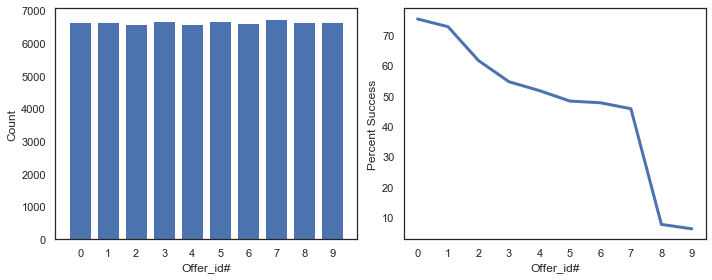

In [70]:
f, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
ax[0].bar(percent_success.index, percent_success['count'])
ax[0].set_xticks(np.arange(0,10))
ax[0].set_xlabel('Offer_id#')
ax[0].set_ylabel('Count')

ax[1].plot(percent_success.index, percent_success['percentsuccess'],linewidth=3)
ax[1].set_xticks(np.arange(0,10))
ax[1].set_xlabel('Offer_id#')
ax[1].set_ylabel('Percent Success')
plt.tight_layout()

### offer 是否成功 就是本项目的预测目标

In [71]:
random_state = 0

class_label_name = 'offersuccessful'

variables = clean_data.drop(columns=['offersuccessful','offer_id','totalamount'])
class_label = clean_data.filter([class_label_name])

In [72]:
variables.head()

,time,duration,reward,bogo,discount,informational,email,mobile,social,web,...,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)"
0,0.0,7,5,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.0,3,0,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,7,5,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.0,3,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,7,10,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


##### Split the data into training and testing data

In [73]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(variables.values,
                            class_label.values,
                            test_size=0.2,
                            random_state=random_state)

variable_names = variables.columns[2:]

offerid_train = X_train[:, 0]
totalamount_train = X_train[:, 1]
X_train = X_train[:, 2:].astype('float64')

offerid_test = X_test[:, 0]
totalamount_test = X_test[:, 1]
X_test = X_test[:, 2:].astype('float64')

y_train = y_train.ravel()
y_test = y_test.ravel()

In [74]:
# check 为空的字段
total = variables.isnull().sum().sort_values(ascending = False)
percent = (variables.isnull().sum()/variables.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).head()

,Total,Percent
"[100, 110)",0,0.0
"[90, 100)",0,0.0
duration,0,0.0
reward,0,0.0
bogo,0,0.0


In [75]:
variables.shape

(66501, 24)

In [76]:
variables.columns

Index(['time', 'duration', 'reward', 'bogo', 'discount', 'informational',
       'email', 'mobile', 'social', 'web', 'F', 'M', 'O', 'income', '[10, 20)',
       '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
       '[80, 90)', '[90, 100)', '[100, 110)'],
      dtype='object')

## 4. 建立并训练模型

In [77]:
from build_model import evaluate_model_performance

In [78]:
# 选出最优的指标
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(variables, class_label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(variables.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(20, 'Score'))  # print best 20 features

         Features         Score
13         income  9.758458e+06
5   informational  8.609928e+03
2          reward  6.694556e+03
1        duration  4.313926e+03
4        discount  1.860510e+03
0            time  7.090731e+02
8          social  6.854945e+02
3            bogo  5.041526e+02
10              F  3.899760e+02
9             web  3.706438e+02
11              M  3.079030e+02
15       [20, 30)  2.239199e+02
14       [10, 20)  6.526332e+01
18       [50, 60)  4.552723e+01
16       [30, 40)  4.340866e+01
12              O  2.595500e+01
21       [80, 90)  2.545464e+01
19       [60, 70)  2.311820e+01
23     [100, 110)  5.529782e+00
20       [70, 80)  4.169274e+00


In [79]:
model_performance = []

classifier_type = ['logisticregression',
                   'randomforest',
                   'gradientboosting']

In [80]:
model_dir = "./models_0219"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

scorer = make_scorer(fbeta_score, beta=0.5)

In [81]:
# Number of trees in random forest
n_estimators = [10, 50, 100]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Minimum number of samples required to split a node
min_samples_split = [2, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

In [83]:
def evaluate_model_performance(clf,
                               X_train,
                               y_train,
                              class_name):
    """ Prints a model's accuracy and F1-score

    INPUT:
        clf: Model object

        X_train: Training data matrix

        y_train: Expected model output vector

        class_name: Name of the class used for printing purpose

    OUTPUT:
        clf_accuracy: Model accuracy

        clf_f1_score: Model F1-score"""

    y_pred_rf = clf.predict(X_train)

    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    clf_Precision = precision_score(y_train, y_pred_rf)
    clf_Recall = recall_score(y_train, y_pred_rf)

    print("%s model accuracy: %.3f" % (class_name, clf_accuracy))
    print("%s model f1-score: %.3f" % (class_name, clf_f1_score))
    print("%s model Precision: %.3f" % (class_name, clf_Precision))
    print("%s model Recall: %.3f" % (class_name, clf_Recall))

    return clf_accuracy, clf_f1_score, clf_Precision, clf_Recall


In [84]:
lr_model_path = os.path.join(model_dir, 'lr_clf.joblib')

scorer = make_scorer(fbeta_score,beta=0.5)

if os.path.exists(lr_model_path):
    lr_random = load(lr_model_path)
else:
    lr_clf = LogisticRegression(random_state=random_state,   solver='liblinear')

    random_grid = {'penalty': ['l1', 'l2'],'C': [1.0, 0.1, 0.01]}
    lr_random = RandomizedSearchCV(estimator = lr_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    lr_random.fit(X_train, y_train)
    dump(lr_random, lr_model_path)

    
model_performance.append(evaluate_model_performance(lr_random.best_estimator_,
                                                    X_train,
                                                    y_train,
                                                    'LogisticRegression'))    
# evaluate_model_performance(lr_random.best_estimator_, X_train, y_train,'LogisticRegression')

LogisticRegression model accuracy: 0.697
LogisticRegression model f1-score: 0.702
LogisticRegression model Precision: 0.653
LogisticRegression model Recall: 0.760


In [85]:
rf_model_path = os.path.join(model_dir, 'rf_clf.joblib')

if os.path.exists(rf_model_path):
    rf_random = load(rf_model_path)
else:
    rf_clf = RandomForestClassifier(random_state=random_state)

   

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf}

    rf_random = RandomizedSearchCV(estimator = rf_clf,
                                       param_distributions = random_grid,
                                       scoring=scorer,
                                       n_iter = 100,
                                       cv = 3,
                                       verbose=2,
                                       random_state=random_state,
                                       n_jobs = 3)

    rf_random.fit(X_train, y_train)
    dump(rf_random,rf_model_path)

#evaluate_model_performance(rf_random.best_estimator_, X_train, y_train, 'RandomForestClassifier')

model_performance.append(evaluate_model_performance(rf_random.best_estimator_,X_train,y_train,'RandomForestClassifier'))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   36.7s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  1.2min finished


RandomForestClassifier model accuracy: 0.753
RandomForestClassifier model f1-score: 0.747
RandomForestClassifier model Precision: 0.722
RandomForestClassifier model Recall: 0.775


In [88]:
gb_model_path = os.path.join(model_dir, 'gb_clf.joblib')

if os.path.exists(gb_model_path):
    gb_random = load(gb_model_path)
else:
    gb_clf = GradientBoostingClassifier(random_state=random_state)

    # Create the random grid
    random_grid = {'loss': ['deviance', 'exponential'],
                       #'learning_rate': [0.1, 0.005],
                       'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split}

    gb_random = RandomizedSearchCV(estimator = gb_clf,
                                       param_distributions = random_grid,
                                       scoring=scorer,
                                       n_iter = 100,
                                       cv = 3,
                                       verbose=2,
                                       random_state=random_state,
                                       n_jobs = 3)
    gb_random.fit(X_train, y_train)
    dump(gb_random,gb_model_path)


#evaluate_model_performance(gb_random.best_estimator_, X_train, y_train,'GradientBoostingClassifier')

model_performance.append(evaluate_model_performance(gb_random.best_estimator_, X_train,y_train,'GradientBoostingClassifier'))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  2.4min finished


GradientBoostingClassifier model accuracy: 0.708
GradientBoostingClassifier model f1-score: 0.709
GradientBoostingClassifier model Precision: 0.668
GradientBoostingClassifier model Recall: 0.756


In [89]:
model_performance = pd.DataFrame(model_performance,columns=['accuracy', 'f1score', 'Precision', 'Recall'])

classifier_type = pd.DataFrame(classifier_type,columns=['model'])

model_performance = pd.concat([classifier_type, model_performance], axis=1)

model_performance = model_performance.sort_values('accuracy', ascending=False)
model_performance = model_performance.reset_index(drop=True)
model_performance

,model,accuracy,f1score,Precision,Recall
0,randomforest,0.753421,0.747488,0.721597,0.775306
1,gradientboosting,0.708008,0.709145,0.667619,0.756179
2,logisticregression,0.696861,0.702350,0.652996,0.759773


**由此得到效果最好的estimator为RandomForestClassifier**

In [90]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Text(0.5, 1.0, 'Random Forest Estimated Feature Importance')

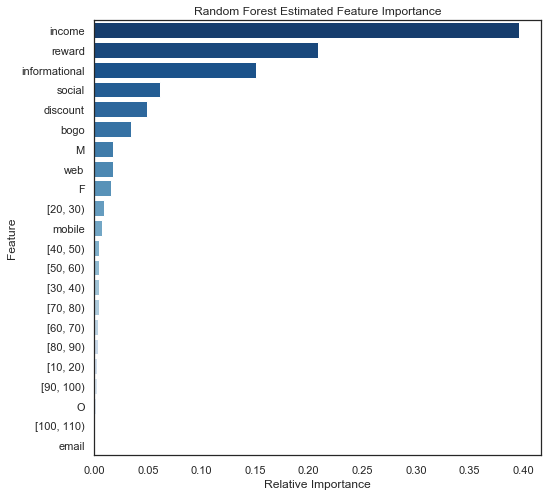

In [91]:
relative_importance = rf_random.best_estimator_.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =  pd.DataFrame(list(zip(variable_names, relative_importance)),  columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance', ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("Blues_r", feature_importance.shape[0])

plt.figure(figsize=(8, 8))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Random Forest Estimated Feature Importance')

根据各个指标对于交易是否成功影响的重要性可以发现
- 收入是重要因素
- 顾客对discount的反应要比bogo的要好。
- 男性比女性更有可能购买。
- 年龄段20-30顾客更容易消费。
- 通过社交平台进行推广，效果更好。

In [92]:
grid_fit_path = os.path.join(model_dir, 'grid_fit.joblib')

if os.path.exists(grid_fit_path):
    grid_fit = load(grid_fit_path)
else:
    parameters = {'n_estimators': [50],
                  'min_samples_leaf': [4],
                  'min_samples_split': [10],
                  'max_features':['auto']}
    rf_clf = RandomForestClassifier(random_state=random_state)

    grid_obj = GridSearchCV(rf_clf,
                            parameters,
                            scoring=scorer,
                            cv=3)
                            #n_jobs=1,
                            #verbose=0)

    grid_fit = grid_obj.fit(X_train,
                            y_train)

    dump(grid_fit, grid_fit_path)

# Get the estimator
best_clf = grid_fit.best_estimator_

evaluate_model_performance(best_clf, X_train, y_train,'BestGridFit')

BestGridFit model accuracy: 0.753
BestGridFit model f1-score: 0.747
BestGridFit model Precision: 0.722
BestGridFit model Recall: 0.775


(0.753421052631579, 0.747487969201155, 0.7215966105474412, 0.7753064728666693)

In [93]:
# 用best_clf 来评估测试数据集

evaluate_model_performance(best_clf, X_test, y_test,'BestGrid')

BestGrid model accuracy: 0.691
BestGrid model f1-score: 0.689
BestGrid model Precision: 0.661
BestGrid model Recall: 0.719


(0.6913014059093301, 0.6888922564024852, 0.6611401977894125, 0.719076241695666)

## 5. 提供模型预测效果和结论

根据各个指标对于交易是否成功影响的重要性可以发现
- 收入是重要因素
- 顾客对discount的反应要比bogo的要好。
- 男性比女性更有可能购买。
- 年龄段20-30顾客更容易消费。
- 通过社交平台进行推广，效果更好。

比较了三种模型的性能：logistic regression, random forest, and gradient boosting models。其中，random forest是训练数据集中的最佳模型，其准确性为0.75，f1_score为0.75，Precision为0.722，Recall为0.775。当我们使用测试数据进行分析时，准确性达到0.69，f1_score达到0.69，可以说该模型没有出现预测的过拟合


### 成果输出
#### 1. 机器学习模型的输出
**即 ./models_0219 路径下的.joblib文件**
#### 2. 清洗后数据集的输出
**将 DataFrame中 clean_data 输出为 .db 数据库文件，如下**

In [98]:
def save_data(df, database_filename):
    # table name
    table_name = 'clean_data'
    # create engine
    engine = create_engine('sqlite:///{}'.format(database_filename))
    # save dataframe to database, relace if already exists
    df.to_sql(table_name, engine, index=False, if_exists='replace')

save_data(clean_data, 'clean_data.db')

### 改进方向
- 创建全新数字特征指标改善机器学习模型

由于客户收入 报价持续时间 报价奖励这些数字特征对于模型影响较大：可以创建一个融合以上特征的全新多项式指标来改善机器学习模型。如new_feature特征，之后将该特征也做归一化处理，进行模型训练。

`new_feature = duration*reward/income`